## 0. Setup

In [31]:
# Import dependencies
import torch
import torch.nn as nn
from plot_lib import set_default, show_scatterplot, plot_bases
from matplotlib.pyplot import plot, title, axis
import numpy as np

In [32]:
# Set up your device 
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")

In [33]:
# Set up random seed to 1008. Do not change the random seed.
seed = 1008
torch.manual_seed(seed)
if cuda:
    torch.cuda.manual_seed_all(seed)

## 1. Data generation
#### You'll be creating data points that are generated from a particular function.

### 1.1 Quadratic: $y = f(x) = x^2$

In [34]:
# Implement the function below
def quadratic_data_generator(n_samples):
    """
    Generate: 
    1) tensor x of size (n_samples, 1) 
    with values uniformly distributed in the interval (-1, 1] 
    using torch.rand()
    2) tensor y of size (n_samples, 1) 
    equal to x^2 using torch.pow() 
    
    The function should return: x, y
    """
    # torch.rand() returns values uniformly distributed in the interval [0, 1)
    # [0, 1) *(-2)=> (-2, 0] +1=> (-1, 1] 
    x = torch.rand((n_samples, 1)) * -2  + 1
    y = torch.pow(x, 2)
    return x.to(device), y.to(device)

In [52]:
# Generate the data with n_samples = 128
x_quadr, y_quadr = quadratic_data_generator(128)

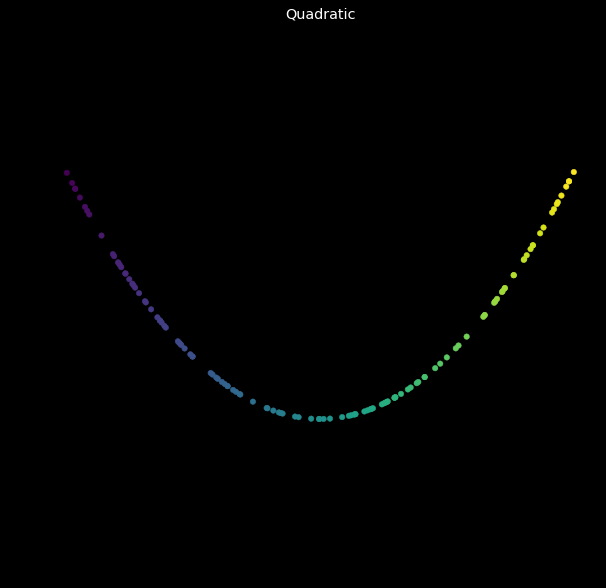

In [36]:
# Visualize the data
set_default()
# set colors
# combine data
X_quad = torch.cat((x_quadr, y_quadr), dim = 1)
colors = X_quad[:,0]
# plot
show_scatterplot(X_quad, colors, title = "Quadratic")

### 1.2 Cubic: $y = f(x) = x^3 - 0.5x$

In [37]:
# Implement the function below
def cubic_data_generator(n_samples):
    """
    Generate: 
    1) tensor x of size (n_samples, 1) 
    with values uniformly distributed in the interval (-1, 1] 
    using torch.rand()
    2) tensor y of size (n_samples, 1) 
    equal to (x^3 - 0.5x) using torch.pow() and torch.mul() 
    
    The function should return: x, y
    """
    x = torch.rand((n_samples, 1)) * -2  + 1
    y = torch.pow(x, 3)  - torch.mul(x, 0.5)
    return x.to(device), y.to(device)

In [38]:
# Generate the data with n_samples = 128
x_cubic, y_cubic = cubic_data_generator(128)

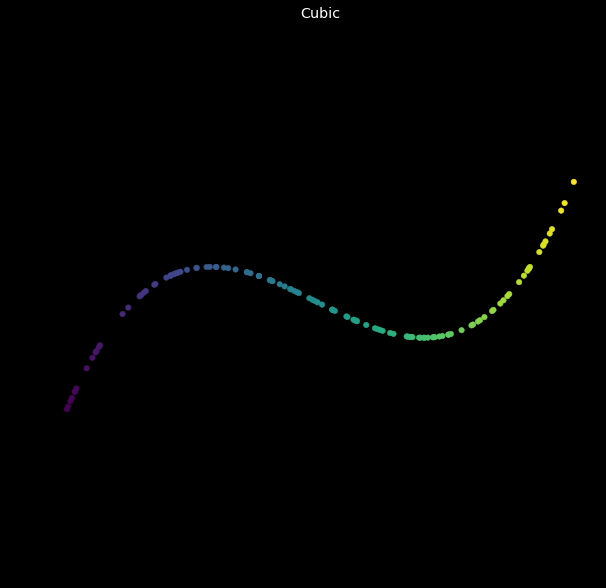

In [39]:
# Visualize the data 
X_cubic = torch.cat((x_cubic, y_cubic), dim = 1)
colors = X_cubic[:,0]
# plot
show_scatterplot(X_cubic, colors, title = "Cubic")

### 1.3 Sine: $y = f(x) = \sin(2.5x)$

In [40]:
# Implement the function below
def sine_data_generator(n_samples):
    """
    Generate: 
    1) tensor x of size (n_samples, 1) 
    with values uniformly distributed in the interval (-1, 1] 
    using torch.rand()
    2) tensor y of size (n_samples, 1) 
    equal to sin(2.5 * x) using torch.sin() 
    
    The function should return: x, y
    """
    x = torch.rand((n_samples, 1)) * -2  + 1
    y = torch.sin(x * 2.5)
    return x.to(device), y.to(device)

In [41]:
# Generate the data with n_samples = 128
x_sine, y_sine = sine_data_generator(128)

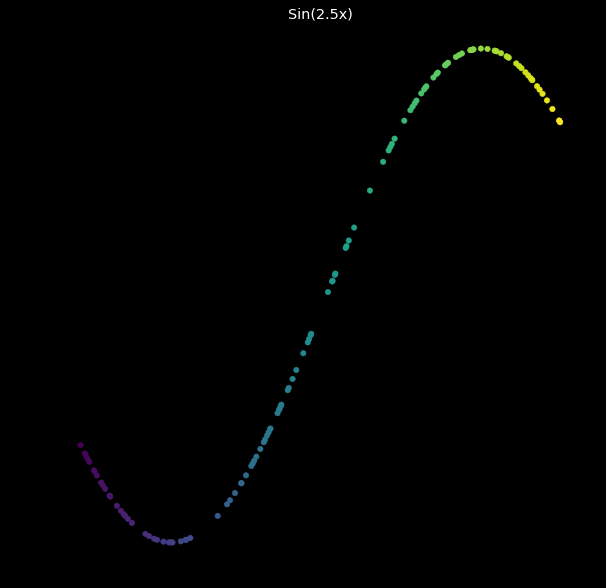

In [42]:
# Visualize the data 
X_sine = torch.cat((x_sine, y_sine), dim = 1)
colors = X_sine[:,0]
# plot
show_scatterplot(X_sine, colors, title = "Sin(2.5x)")

### 1.4 Absolute value: $y = f(x) = |x|$

In [43]:
# Implement the function below
def abs_data_generator(n_samples):
    """
    Generate: 
    1) tensor x of size (n_samples, 1) 
    with values uniformly distributed in the interval (-1, 1] 
    using torch.rand()
    2) tensor y of size (n_samples, 1) 
    equal to |x| using torch.abs() 
    
    The function should return: x, y
    """
    x = torch.rand((n_samples, 1)) * -2  + 1
    y = torch.abs(x)
    return x.to(device), y.to(device)

In [44]:
# Generate the data with n_samples = 128
x_abs, y_abs = abs_data_generator(128)

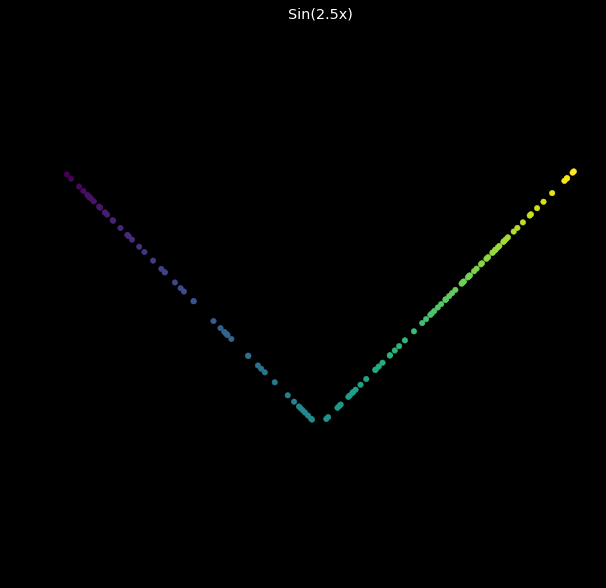

In [45]:
# Visualize the data 
X_abs = torch.cat((x_abs, y_abs), dim = 1)
colors = X_abs[:,0]
# plot
show_scatterplot(X_abs, colors, title = "Sin(2.5x)")

### 1.5 Heavyside Step Function: $y = f(x) = \begin{cases} 0, & x < 0 \\ 1, & x \geq 0 \end{cases}$

In [46]:
# Implement the function below
def hs_data_generator(n_samples):
    """
    Generate: 
    1) tensor x of size (n_samples, 1) 
    with values uniformly distributed in the interval (-1, 1] 
    using torch.rand()
    2) tensor y of size (n_samples, 1) 
    equal to the Heavyside Step Function using a condition.
    Make sure that y is a torch.FloatTensor.
    
    The function should return: x, y
    """
    x = torch.rand((n_samples, 1)) * -2  + 1
    y = torch.FloatTensor(np.array([np.heaviside(e, 1) for e in x])).view(-1, 1)
    return x.to(device), y.to(device)

In [47]:
# Generate the data with n_samples = 128
x_hs, y_hs = hs_data_generator(128)

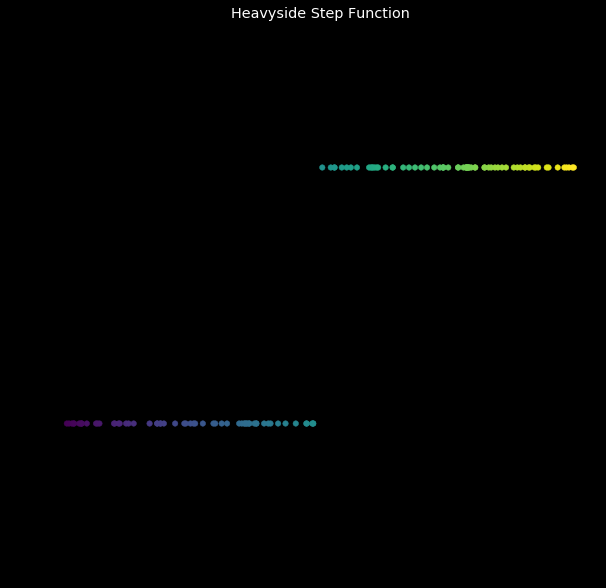

In [48]:
# Visualize the data 
X_hs = torch.cat((x_hs, y_hs), dim = 1)
colors = X_hs[:,0]
# plot
show_scatterplot(X_hs, colors, title = "Heavyside Step Function")

## 2. Models
#### You are going to approximate the functions above with fully connected models of different depths.  

### 2.1. Dimensionality
The models you define below will be predicting $y$ from $x$ and will use the data generated in Part 1 as training data. Fill in the input and output dimensions for each of the models.

Hint: These dimensions are independent from the number of samples. 

In [49]:
input_dim = 2
output_dim = 2

### 2.2. No Hidden 
Define a model with a single linear module `torch.nn.Linear(input_dim, output_dim)` and no non-linearity.

In [69]:
class Linear_0H(nn.Module):
    def __init__(self):
        super(Linear_0H, self).__init__()
        
        # Layers
        self.network = nn.Linear(input_dim, output_dim)
        pass
    
    def forward(self, code):
        # reshape the input "code"????
        code = code.view(-1, input_dim)
        return self.network(code)


### 2.2. One Hidden 
Define a model with a single hidden layer of size 3 and one ReLU non-linearity.
Use `nn.Sequential()` for defining the layers.

Hint: Architecture should be `nn.Linear(intput_dim, 3)` -> `nn.ReLU()` -> `nn.Linear(3, output_dim)`

In [60]:
class Linear_1H(nn.Module):
    def __init__(self):
        super(Linear_1H, self).__init__()
        
        # Layers
        self.network = nn.Sequential(
            nn.Linear(input_dim, 3)
            nn.ReLU(),
            nn.Linear(3, output_dim)
            )
        pass

    def forward(self, x):
        # reshape the signal
        x = x.view(-1, input_dim)
        return self.network(x)
        pass

### 2.3. Two Hidden 
Define a model with a two hidden layers of size 3 and two ReLU non-linearities.
Use `nn.Sequential()` for defining the layers.

Hint: Architecture should be `nn.Linear(input_dim,3)` -> `nn.ReLU()` -> `nn.Linear(3,3)` -> `nn.ReLU()` -> `nn.Linear(3, output_dim)`

In [61]:
class Linear_2H(nn.Module):
    def __init__(self):
        super(Linear_2H, self).__init__()
        
        self.network = nn.Sequential(
            nn.Linear(input_dim, 3),
            nn.ReLU(),
            nn.Linear(3, 3),
            nn.ReLU(),
            nn.Linear(3, output_dim)
            )
        pass

    def forward(self, x):
        # reshape the signal
        x = x.view(-1, input_dim)
        return self.network(x)
        pass

## 3. Training

### 3.1 Train method
You are going to implement a training method which takes a model, number of epochs, training data, and threshold for loss functions as input and returns the (detached) predicitons from the last epoch. 

Make sure you understand what the method is doing and how early stopping works in this case.

In [78]:
# Training function
def train(model, epochs, x, y, loss_threshold=1e-2):
    # Set model to training mode
    model.train()
    
    # Define Mean Squared Error as loss function using nn.MSELoss()
    critereon = nn.MSELoss()
    
    # Define the SGD optimizer with learning rate of 0.01 using torch.optim.SGD()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    
    # Training loop
    for epoch in range(epochs):
        # Forward data through model 
        y_pred = model.forward(x)
        
        # reshape y_pred with the same shape as training data
        y_pred = y_pred.view_as(y)
        
        # Compute the loss 
        loss = critereon(y_pred, y) 
        
        # Zero-out the optimizer 
        optimizer.zero_grad()
        
        # Backpropagate loss
        loss.backward()
        
        # Make a step with the optimizer
        optimizer.step()
        
        # Uncomment lines below once you implement the code above
        # Print out loss every 100 epochs 
        if epoch == 0 or (epoch+1) % 100 == 0:
            print('Epoch {} loss: {}'.format(epoch+1, loss.item()))
        
        # Uncomment lines below once you implement the code above
        # Early stopping based on training loss
        if loss.item() < loss_threshold:
            print('Epoch {} loss: {}'.format(epoch+1, loss.item()))
            break    
        
    
    # Return predictions from the last epoch.
    # Uncomment line below once you implement
    return y_pred.detach()

### 3.2. `Linear_0H`

In [79]:
# Define model
model_0H = Linear_0H().to(device)

In [80]:
# Train model on quadratic data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_0H, epochs=10000, x=x_quadr, y=y_quadr, loss_threshold=1e-2)

Epoch 1 loss: 0.5696114897727966
Epoch 100 loss: 0.17407868802547455
Epoch 200 loss: 0.1075168251991272
Epoch 300 loss: 0.0919739305973053
Epoch 400 loss: 0.08644106239080429
Epoch 500 loss: 0.08391444385051727
Epoch 600 loss: 0.08265317976474762
Epoch 700 loss: 0.08200714737176895
Epoch 800 loss: 0.08167382329702377
Epoch 900 loss: 0.08150143176317215
Epoch 1000 loss: 0.081412173807621
Epoch 1100 loss: 0.0813659280538559
Epoch 1200 loss: 0.0813419446349144
Epoch 1300 loss: 0.08132950216531754
Epoch 1400 loss: 0.0813230499625206
Epoch 1500 loss: 0.08131969720125198
Epoch 1600 loss: 0.0813179537653923
Epoch 1700 loss: 0.08131704479455948
Epoch 1800 loss: 0.08131657540798187
Epoch 1900 loss: 0.08131632953882217
Epoch 2000 loss: 0.08131620287895203
Epoch 2100 loss: 0.08131613582372665
Epoch 2200 loss: 0.08131609857082367
Epoch 2300 loss: 0.08131608366966248
Epoch 2400 loss: 0.08131607621908188
Epoch 2500 loss: 0.08131606876850128
Epoch 2600 loss: 0.08131606876850128
Epoch 2700 loss: 0.081

In [ ]:
# Plot predictions vs actual data
# TODO

In [ ]:
# Define model
model_0H = Linear_0H().to(device)

In [ ]:
# Train model on cubic data for 10000 epochs and loss_threshold=1e-2
y_pred = train(model_0H, epochs=10000, x=x_cubic, y=y_cubic, loss_threshold=1e-2)

In [ ]:
# Plot predictions vs actual data
# TODO

In [ ]:
# Define model
model_0H = Linear_0H().to(device)

In [ ]:
# Train model on sine data for 10000 epochs and loss_threshold=1e-2
y_pred = train(model_0H, epochs=10000, x=x_sine, y=y_sine, loss_threshold=1e-2)

In [ ]:
# Plot predictions vs actual data
# TODO

In [ ]:
# Define model
model_0H = Linear_0H().to(device)

In [ ]:
# Train model on abosulte value data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_0H, epochs=10000, x=x_abs, y=y_abs, loss_threshold=1e-2)

In [ ]:
# Plot predictions vs actual data
# TODO

In [ ]:
# Define model
model_0H = Linear_0H().to(device)

In [ ]:
# Train model on Heavyside Step Function data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_0H, epochs=10000, x=x_hs, y=y_hs, loss_threshold=1e-2)

In [ ]:
# Plot predictions vs actual data
# TODO

### 3.3. `Linear_1H`

In [ ]:
# Define model
model_1H = Linear_1H().to(device)

In [ ]:
# Train model on quadratic data for 10000 epochs and loss threshold 1e-2
y_pred = train(model_1H, epochs=10000, x=x_quadr, y=y_quadr, loss_threshold=1e-2)

In [ ]:
# Plot predictions vs actual data
# TODO

In [ ]:
# Define model
model_1H = Linear_1H().to(device)

In [ ]:
# Train model on cubic data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_1H, epochs=10000, x=x_cubic, y=y_cubic, loss_threshold=1e-2)

In [ ]:
# Plot predictions vs actual data
# TODO

In [ ]:
# Define model
model_1H = Linear_1H().to(device)

In [ ]:
# Train model on sine data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_1H, epochs=10000, x=x_sine, y=y_sine, loss_threshold=1e-2)

In [ ]:
# Plot predictions vs actual data
# TODO

In [ ]:
# Define model
model_1H = Linear_1H().to(device)

In [ ]:
# Train model on abosulte value data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_1H, epochs=10000, x=x_abs, y=y_abs, loss_threshold=1e-2)

In [ ]:
# Plot predictions vs actual data
# TODO

In [ ]:
# Define model
model_1H = Linear_1H().to(device)

In [ ]:
# Train model on Heavyside Step Function data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_1H, epochs=10000, x=x_hs, y=y_hs, loss_threshold=1e-2)

In [ ]:
# Plot predictions vs actual data
# TODO

### 3.3. `Linear_2H`

In [ ]:
# Define model
model_2H = Linear_2H().to(device)

In [ ]:
# Train model on quadratic data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_2H, epochs=10000, x=x_quadr, y=y_quadr, loss_threshold=1e-2)

In [ ]:
# Plot predictions vs actual data
# TODO

In [ ]:
# Define model
model_2H = Linear_2H().to(device)

In [ ]:
# Train model on cubic data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_2H, epochs=10000, x=x_cubic, y=y_cubic, loss_threshold=1e-2)

In [ ]:
# Plot predictions vs actual data
# TODO

In [ ]:
# Define model
model_2H = Linear_2H().to(device)

In [ ]:
# Train model on sine data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_2H, epochs=10000, x=x_sine, y=y_sine, loss_threshold=1e-2)

In [ ]:
# Plot predictions vs actual data
# TODO

In [ ]:
# Define model
model_2H = Linear_2H().to(device)

In [ ]:
# Train model on abosulte value data for 10000 epochs and loss_threshold=1e-2
y_pred = train(model_2H, epochs=10000, x=x_abs, y=y_abs, loss_threshold=1e-2)

In [ ]:
# Plot predictions vs actual data
# TODO

In [ ]:
# Define model
model_2H = Linear_2H().to(device)

In [ ]:
# Train model on Heavyside Step Function data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_2H, epochs=10000, x=x_hs, y=y_hs, loss_threshold=1e-2)

In [ ]:
# Plot predictions vs actual data
# TODO

### 3.4. Which of the models stopped early and on what data?
Please list the experiments where the `loss_threshold` of 1e-2 was reached early. 

List: 